In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


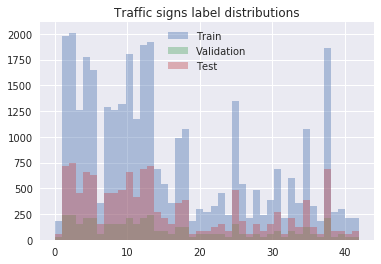

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline

fig = plt.figure()
sns.set(color_codes=True)
sns.distplot(y_train,kde = False, bins=n_classes,label='Train')
sns.distplot(y_valid,kde = False, bins=n_classes,label='Validation')
sns.distplot(y_test,kde = False, bins=n_classes,label='Test')

plt.title('Traffic signs label distributions')
plt.legend()

plt.savefig('readme_files/visual.png')

38


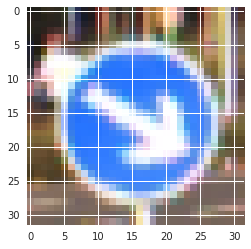

In [7]:
import random

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure()
plt.imshow(image)
print(y_train[index])

plt.savefig('readme_files/sample.png')

In [8]:
with open('Augmented_data/train.p','rb') as f:
    X_train = pickle.load(f)

with open('Augmented_data/train_y.p','rb') as f:
    y_train = pickle.load(f)    

with open('Augmented_data/valid.p','rb') as f:
    X_valid = pickle.load(f)

with open('Augmented_data/test.p','rb') as f:
    X_test = pickle.load(f)

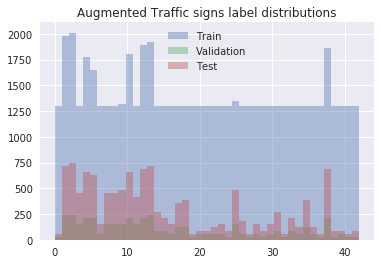

In [10]:
fig = plt.figure()
sns.set(color_codes=True)
sns.distplot(y_train,kde = False, bins=n_classes,label='Train')
sns.distplot(y_valid,kde = False, bins=n_classes,label='Validation')
sns.distplot(y_test,kde = False, bins=n_classes,label='Test')

plt.title('Augmented Traffic signs label distributions')
plt.legend()

plt.savefig('readme_files/aug.png')

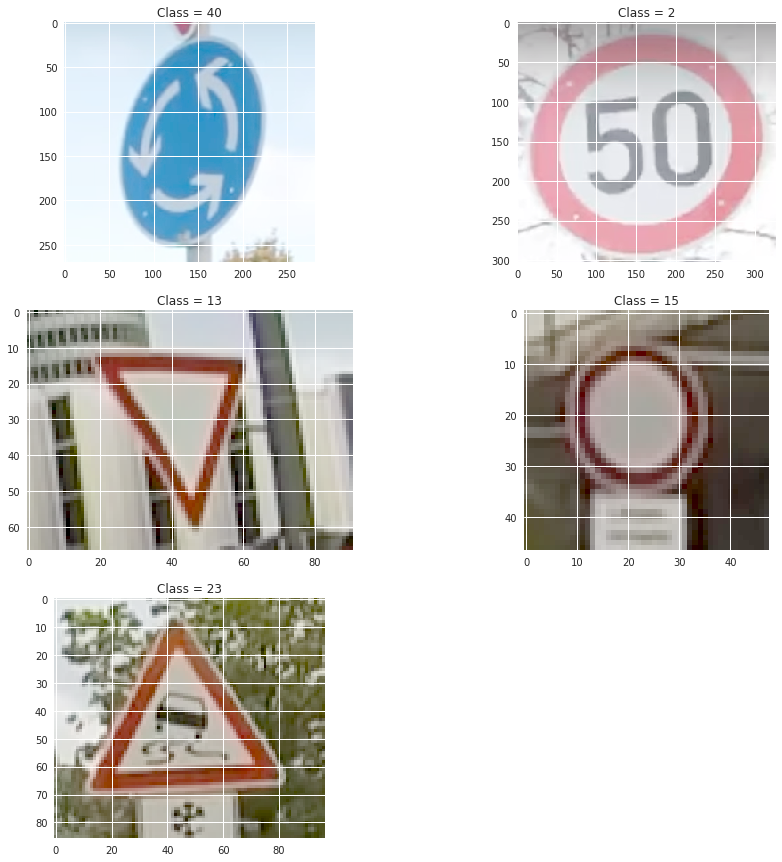

In [22]:
import glob
import imageio

test_labels = np.array([40,2,13,15,23])
plt.figure(figsize = (15,15))
i=1
for name in sorted(glob.glob('Test_Images/img?.PNG')):
    
    plt.subplot(3,2,i)
    img = imageio.imread(name).astype(np.uint8)
    plt.title('Class = '+ str(test_labels[i-1]))
    plt.imshow(img)
    i+=1
    
plt.savefig('readme_files/new.png')

plt.show()
    